# <span style="color:darkblue"> Lecture 12: Application 2 - Random Assignment </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [3]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [4]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Control
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Control
3,16.0,8,304,150,3433,12.0,A-1689813,Control
4,17.0,8,302,140,3449,10.5,F-1689824,Control
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Treatment
394,44.0,4,97,52,2130,24.6,V-1694114,Treatment
395,32.0,4,135,84,2295,11.6,D-1694125,Control
396,28.0,4,120,79,2625,18.6,F-1694136,Control


<font size = "5">

Compute frequencies by status

In [5]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,260
Treatment,138


col_0,Frequency
status,
Control,0.653266
Treatment,0.346734


<font size = "5">

Query with string conditions

In [6]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [7]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,138.000000,138.000000,138.000000,138.000000,138.000000
mean,23.442754,5.521739,195.485507,2977.311594,15.569565
std,8.074642,1.709644,100.239948,822.339318,2.664380
min,11.000000,3.000000,68.000000,1760.000000,8.500000
25%,17.000000,4.000000,105.500000,2238.750000,13.775000
50%,22.000000,5.000000,151.000000,2832.500000,15.500000
75%,29.725000,8.000000,291.500000,3568.250000,17.000000
max,44.300000,8.000000,440.000000,4735.000000,24.600000


,mpg,cylinders,displacement,weight,acceleration
count,260.000000,260.000000,260.000000,260.000000,260.000000
mean,23.552692,5.419231,192.334615,2966.769231,15.567308
std,7.690717,1.698630,106.518980,861.106871,2.811018
min,9.000000,3.000000,70.000000,1613.000000,8.000000
25%,17.500000,4.000000,98.000000,2219.750000,13.875000
50%,23.100000,4.000000,145.000000,2797.500000,15.500000
75%,29.000000,8.000000,262.000000,3611.750000,17.225000
max,46.600000,8.000000,455.000000,5140.000000,24.800000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [13]:
#a
def fn_lotsofcylinders(cylinders):
    if cylinders >= 6:
        return "yes"
    else: return "no"

carfeatures["lots of cylinders"] = carfeatures["cylinders"].apply(fn_lotsofcylinders)
#the new column (variable) is called "lots of cylinders"

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,lots of cylinders
0,18.0,8,307,130,3504,12.0,C-1689780,Control,yes
1,15.0,8,350,165,3693,11.5,B-1689791,Control,yes
2,18.0,8,318,150,3436,11.0,P-1689802,Control,yes
3,16.0,8,304,150,3433,12.0,A-1689813,Control,yes
4,17.0,8,302,140,3449,10.5,F-1689824,Control,yes
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Treatment,no
394,44.0,4,97,52,2130,24.6,V-1694114,Treatment,no
395,32.0,4,135,84,2295,11.6,D-1694125,Control,no
396,28.0,4,120,79,2625,18.6,F-1694136,Control,no


<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [33]:
print(carfeatures.mean()) #general mean for all criteria

#if you only want mean/median for a specific criteria
print(carfeatures["mpg"].mean())
print(carfeatures["mpg"].median())

data_threshold_mpg        = carfeatures.query("mpg >= 25")
data_rangeacceleration    = carfeatures.query("(acceleration >= 10) & (acceleration < 18) & (mpg >= 40)")

#subset
list_subsetcols     = ["acceleration","mpg"]
subcols_carfeatures = data_rangeacceleration[list_subsetcols] #this subset is taken of the data_rangeacceleration, so only includes the observations from that query
display(subcols_carfeatures)

mpg               23.514573
cylinders          5.454774
displacement     193.427136
weight          2970.424623
acceleration      15.568090
dtype: float64
23.514572864321615
23.0


/var/folders/xy/r3f3w9y96gs9p04h7znc3p5w0000gn/T/ipykernel_34214/3427194350.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(carfeatures.mean()) #general mean for all criteria


,acceleration,mpg
309,14.7,41.5
322,17.9,46.6
329,13.8,44.6
330,17.3,40.9


<font size = "5">

(c) Use sorting + ".iloc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [39]:
carsorted = carfeatures.sort_values(by = "mpg", ascending = False) #sort by mpg
display(carsorted.iloc[[0,1,2],:]) #this gets only the first 3 rows

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,lots of cylinders
322,46.6,4,86,65,2110,17.9,M-1693322,Control,no
329,44.6,4,91,67,1850,13.8,H-1693399,Control,no
325,44.3,4,90,48,2085,21.7,V-1693355,Treatment,no


<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [47]:
list_status  = ["Group 1","Group 2","Group 3"]
prop_status  = [0.4,0.2,0.4]
size_dataset = len(carfeatures)

carfeatures["group"] = np.random.choice(list_status, size = size_dataset, p = prop_status)

data_g1 = carfeatures.query("group == 'Group 1'")
data_g2 = carfeatures.query("group == 'Group 2'")
data_g3 = carfeatures.query("group == 'Group 3'")

display(data_g1)
display(data_g2)
display(data_g3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,lots of cylinders,group
1,15.0,8,350,165,3693,11.5,B-1689791,Group 3,yes,Group 1
4,17.0,8,302,140,3449,10.5,F-1689824,Group 2,yes,Group 1
6,14.0,8,454,220,4354,9.0,C-1689846,Group 1,yes,Group 1
8,14.0,8,455,225,4425,10.0,P-1689868,Group 1,yes,Group 1
10,15.0,8,383,170,3563,10.0,D-1689890,Group 2,yes,Group 1
...,...,...,...,...,...,...,...,...,...,...
374,23.0,4,151,?,3035,20.5,A-1693894,Group 2,no,Group 1
379,36.0,4,98,70,2125,17.3,M-1693949,Group 3,no,Group 1
381,36.0,4,107,75,2205,14.5,H-1693971,Group 1,no,Group 1
387,38.0,6,262,85,3015,17.0,O-1694037,Group 1,yes,Group 1


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,lots of cylinders,group
0,18.0,8,307,130,3504,12.0,C-1689780,Group 3,yes,Group 2
17,21.0,6,200,85,2587,16.0,F-1689967,Group 3,yes,Group 2
19,26.0,4,97,46,1835,20.5,V-1689989,Group 1,no,Group 2
28,9.0,8,304,193,4732,18.5,H-1690088,Group 2,yes,Group 2
30,28.0,4,140,90,2264,15.5,C-1690110,Group 1,no,Group 2
...,...,...,...,...,...,...,...,...,...,...
384,32.0,4,91,67,1965,15.7,H-1694004,Group 2,no,Group 2
386,25.0,6,181,110,2945,16.4,B-1694026,Group 1,yes,Group 2
388,26.0,4,156,92,2585,14.5,C-1694048,Group 1,no,Group 2
393,27.0,4,140,86,2790,15.6,F-1694103,Group 3,no,Group 2


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status,lots of cylinders,group
2,18.0,8,318,150,3436,11.0,P-1689802,Group 3,yes,Group 3
3,16.0,8,304,150,3433,12.0,A-1689813,Group 1,yes,Group 3
5,15.0,8,429,198,4341,10.0,F-1689835,Group 1,yes,Group 3
7,14.0,8,440,215,4312,8.5,P-1689857,Group 1,yes,Group 3
9,15.0,8,390,190,3850,8.5,A-1689879,Group 3,yes,Group 3
...,...,...,...,...,...,...,...,...,...,...
391,36.0,4,135,84,2370,13.0,D-1694081,Group 1,no,Group 3
392,27.0,4,151,90,2950,17.3,C-1694092,Group 3,no,Group 3
394,44.0,4,97,52,2130,24.6,V-1694114,Group 1,no,Group 3
395,32.0,4,135,84,2295,11.6,D-1694125,Group 1,no,Group 3


<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


In [67]:
#print(data_g1["mpg"].mean())

def function(y,x,b0,b1):
    y = data_g1[y]
    x = data_g1[x]
    b0 = y.mean()
    b1 = x.mean()

    print("The mean of y is: " + str(b0))
    print("The mean of x is: " + str(b1))

function("mpg", "weight","test","test2")

def fn_compute_value(P,r,n,t):
    V = P*(1 + r/n)**(n*t)
    return(V)

The mean of y is: 23.06242038216561
The mean of x is: 3018.331210191083


<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

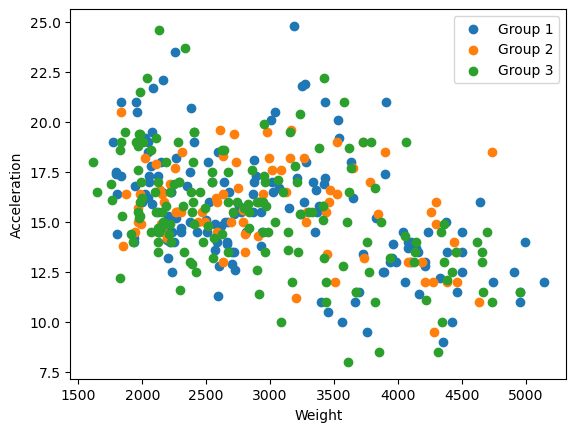

In [51]:
plt.scatter(x = data_g1["weight"], y = data_g1["acceleration"])
plt.scatter(x = data_g2["weight"], y = data_g2["acceleration"])
plt.scatter(x = data_g3["weight"], y = data_g3["acceleration"])

plt.xlabel("Weight")
plt.ylabel("Acceleration")
plt.legend(labels = ["Group 1", "Group 2", "Group 3"])
plt.show() # if you put plt.show after two graphs, it will put both the datapoints on the same graph.